# Exam

During the exam we will analyze League of Legends match data. You will have 10 tasks to complete over `2` hours. You can use any resources you need (internet, notes, documentation), but you must complete the task alone - violation will be severly punished. To pass you need `60%` correct answers. You need to post the exam in your repository until `17:15`. If you post your answers after `17:15`, you won't be graded based on your repository notebook work and will receive a grade of `2`.

### Grading

| Points | Grade |
| :-- | :-- |
| 6 | 3 |
| 7 | 3.5 |
| 8 | 4 |
| 9 | 4.5 |
| 10 | 5 |

Each task can get between `0` and `1` points. So, if you do only a couple of things correct you can get eg. `0.6` points.

In [1]:
# Your student id here
student_id = 136075

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
sns.set()
%load_ext blackcellmagic

## Task 1

`[0.4]` Import the csv file `high_diamond_ranked_10min.csv` to a variable `lol_data`. Set the index column to `gameId`. 

In [4]:
lol_data = pd.read_csv("high_diamond_ranked_10min.csv", index_col="gameId")

`[0.2]` Display random 10 rows from the dataset.

In [5]:
lol_data.sample(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4447467809,0,16,3,0,8,6,15,1,0,1,...,0,17811,7.4,18988,245,48,1870,1732,24.5,1781.1
4501459269,1,12,5,1,8,9,15,0,0,0,...,0,18069,6.8,17268,208,46,-246,-1266,20.8,1806.9
4516498052,1,16,2,0,9,9,10,0,0,0,...,0,16661,6.6,15968,165,31,-1520,-1110,16.5,1666.1
4524772917,0,18,5,0,1,6,1,0,0,0,...,1,17586,6.8,18247,238,54,2607,-59,23.8,1758.6
4521052403,1,15,1,1,8,3,6,0,0,0,...,0,14082,6.8,16615,159,51,-3181,-3298,15.9,1408.2
4522097852,0,17,3,0,8,5,5,0,0,0,...,0,14874,6.8,17575,190,56,-1664,-1691,19.0,1487.4
4517064230,1,13,2,1,9,7,10,1,0,1,...,0,16561,7.0,17732,200,64,-422,308,20.0,1656.1
4521846073,1,22,2,1,6,5,7,1,0,1,...,0,16345,7.2,17952,215,67,-592,-242,21.5,1634.5
4438793603,0,14,3,1,10,4,13,0,0,0,...,0,14793,6.8,17637,205,52,-4185,-3377,20.5,1479.3


`[0.2]` Display the information about the dataset - columns, dtypes, etc.

In [6]:
df = pd.DataFrame(lol_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 4519157822 to 4523772935
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   f

`[0.2]` Display statistical information about the dataset - mean, quartiles, etc.

In [7]:
df.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


## Task 2

`[0.2]` Create a new column `whoWon` which contains `"red"` or `"blue"` based on the `blueWins` column.

In [8]:
df["whoWon"] = df.apply(lambda row: "blue" if row.blueWins == 1 else "red", axis=1)
df.sample(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,whoWon
gameId,,,,,,,,,,,,,,,,,,,,,
4509748129,0,17,4,0,2,5,1,1,1,0,...,16040,6.8,18017,188,61,1387,1802,18.8,1604.0,red
4515536584,0,16,3,1,4,4,4,1,0,1,...,16054,6.8,17714,236,52,634,1526,23.6,1605.4,red
4519863866,1,81,3,0,16,7,12,1,1,0,...,16131,6.8,16495,174,52,-5154,-3837,17.4,1613.1,blue
4523100302,0,17,4,0,1,4,1,0,0,0,...,17194,7.2,19916,282,56,2889,2106,28.2,1719.4,red
4495515321,1,18,2,0,3,1,4,0,0,0,...,15317,6.8,17806,248,58,663,413,24.8,1531.7,blue
4481260961,1,15,2,0,5,5,5,0,0,0,...,14826,6.8,17472,192,42,-726,512,19.2,1482.6,blue
4518413320,1,37,6,0,5,1,6,1,0,1,...,13907,6.8,16898,226,53,-2237,-1009,22.6,1390.7,blue
4522858842,0,11,0,0,2,7,0,0,0,0,...,16541,6.8,18212,226,40,3170,2591,22.6,1654.1,red
4493760439,1,143,2,1,3,5,3,1,1,0,...,16138,7.0,18705,256,43,1371,1951,25.6,1613.8,blue


`[0.2]` Create a new column `firstKill` which contains `"red"` or `"blue"` based on either `blueFirstBlood` or `redFirstBlood`.

In [9]:
df["firstKill"] = df.apply(
    lambda row: "blue" if row.blueFirstBlood == 1 else "red", axis=1
)
df.sample(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,whoWon,firstKill
gameId,,,,,,,,,,,,,,,,,,,,,
4521965103,0,16,5,0,1,2,1,1,0,1,...,7.2,19272,264,64,2131,2173,26.4,1597.1,red,red
4496068567,1,13,2,1,9,5,6,1,0,1,...,6.6,17092,238,36,-834,-1853,23.8,1624.2,blue,blue
4457621044,1,47,3,1,2,1,3,1,1,0,...,6.6,18065,245,56,-661,-139,24.5,1475.9,blue,blue
4511018113,0,13,1,1,1,3,0,0,0,0,...,7.0,18332,244,53,2079,538,24.4,1619.7,red,blue
4524259924,0,18,4,1,7,7,9,1,0,1,...,6.6,16522,183,42,-473,-446,18.3,1604.4,red,blue
4507608751,0,19,2,1,8,7,12,2,1,1,...,7.0,18120,179,60,-106,1098,17.9,1680.6,red,blue
4527509662,1,17,2,1,7,2,8,1,1,0,...,6.4,16321,213,36,-3098,-1882,21.3,1426.1,blue,blue
4494846139,1,14,1,1,9,4,10,0,0,0,...,6.6,17460,223,47,-3634,-2422,22.3,1505.5,blue,blue
4519085208,1,15,0,1,4,1,5,1,1,0,...,7.0,18138,242,64,-486,-865,24.2,1545.6,blue,blue


`[0.1]` Set the dtype of the `whoWon` and `firstKill` to categorical.

In [10]:
df["whoWon"] = df["whoWon"].astype("category")
df["firstKill"] = df["firstKill"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 4519157822 to 4523772935
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   blueWins                      9879 non-null   int64   
 1   blueWardsPlaced               9879 non-null   int64   
 2   blueWardsDestroyed            9879 non-null   int64   
 3   blueFirstBlood                9879 non-null   int64   
 4   blueKills                     9879 non-null   int64   
 5   blueDeaths                    9879 non-null   int64   
 6   blueAssists                   9879 non-null   int64   
 7   blueEliteMonsters             9879 non-null   int64   
 8   blueDragons                   9879 non-null   int64   
 9   blueHeralds                   9879 non-null   int64   
 10  blueTowersDestroyed           9879 non-null   int64   
 11  blueTotalGold                 9879 non-null   int64   
 12  blueAvgLevel                  987

`[0.5]` Cast all `float` columns to `int`, while setting each value to its ceiling.

In [11]:
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].apply(lambda x: int(math.ceil(x)))

df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 4519157822 to 4523772935
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   blueWins                      9879 non-null   int64   
 1   blueWardsPlaced               9879 non-null   int64   
 2   blueWardsDestroyed            9879 non-null   int64   
 3   blueFirstBlood                9879 non-null   int64   
 4   blueKills                     9879 non-null   int64   
 5   blueDeaths                    9879 non-null   int64   
 6   blueAssists                   9879 non-null   int64   
 7   blueEliteMonsters             9879 non-null   int64   
 8   blueDragons                   9879 non-null   int64   
 9   blueHeralds                   9879 non-null   int64   
 10  blueTowersDestroyed           9879 non-null   int64   
 11  blueTotalGold                 9879 non-null   int64   
 12  blueAvgLevel                  987

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,whoWon,firstKill
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,7,17047,197,55,-643,8,20,1657,red,blue
4523371949,0,12,1,0,5,5,5,0,0,0,...,7,17438,240,52,2908,1173,24,1762,red,red
4521474530,0,15,0,0,7,11,4,1,1,0,...,7,17254,203,28,1172,1033,21,1729,red,red
4524384067,0,43,1,0,4,5,5,1,0,1,...,7,17961,235,47,1321,7,24,1648,red,red
4436033771,0,75,4,0,6,6,6,0,0,0,...,7,18313,225,67,1004,-230,23,1741,red,red
4475365709,1,18,0,0,5,3,6,1,1,0,...,7,18060,221,59,-698,-101,23,1521,blue,red
4493010632,1,18,3,1,7,6,7,1,1,0,...,7,15404,164,35,-2411,-1563,17,1447,blue,blue
4496759358,0,16,2,0,5,13,3,0,0,0,...,7,16938,157,54,2615,800,16,1792,red,red
4443048030,0,16,3,0,7,7,8,0,0,0,...,8,19298,240,53,1979,771,24,1838,red,red


## Task 3

`[1.0]` Create two new columns: `blueFinalWards` and `redFinalWards` that are calculated in the following manner:

```
blueFinalWards = blueWardsPlaced - redWardsDestroyed
redFinalWards = redWardsPlaced - blueWardsDestroyed
```

In [12]:
df["blueFinalWards"] = df.apply(
    lambda row: row.blueWardsPlaced - row.redWardsDestroyed, axis=1
)
df["redFinalWards"] = df.apply(
    lambda row: row.redWardsPlaced - row.blueWardsDestroyed, axis=1
)

df.head(5)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,whoWon,firstKill,blueFinalWards,redFinalWards
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,197,55,-643,8,20,1657,red,blue,22,13
4523371949,0,12,1,0,5,5,5,0,0,0,...,240,52,2908,1173,24,1762,red,red,11,11
4521474530,0,15,0,0,7,11,4,1,1,0,...,203,28,1172,1033,21,1729,red,red,12,15
4524384067,0,43,1,0,4,5,5,1,0,1,...,235,47,1321,7,24,1648,red,red,41,14
4436033771,0,75,4,0,6,6,6,0,0,0,...,225,67,1004,-230,23,1741,red,red,73,13


## Task 4

`[0.5]` Create two new columns: `blueMinionsKilledOutsideJungle` and `redMinionsKilledOutsideJungle` which is a difference of two specific columns in the dataset and save it to the variable `lol_data_updated`.

In [13]:
df["blueMinionsKilledOutsideJungle"] = df.apply(
    lambda row: row.blueTotalMinionsKilled - row.blueTotalJungleMinionsKilled, axis=1
)
df["redMinionsKilledOutsideJungle"] = df.apply(
    lambda row: row.redTotalMinionsKilled - row.redTotalJungleMinionsKilled, axis=1
)
df.head(5)
lol_data_updated = df

`[0.5]` Remove the following columns: `blueTotalMinionsKilled`, `redTotalMinionsKilled`, `blueTotalJungleMinionsKilled`, `redTotalJungleMinionsKilled` and save this to the previous variable.

In [14]:
lol_data = df.drop(
    columns=[
        "blueTotalMinionsKilled",
        "redTotalMinionsKilled",
        "blueTotalJungleMinionsKilled",
        "redTotalJungleMinionsKilled",
    ]
)

## Task 5

`[0.8]` Create a new variable `lol_data_group` where you groupby `whoWon` and `firstKill`, with the following aggregations:

- `blueTotalGold` - sum
- `redTotalGold` -  sum
- `blueKills` - mean
- `redKills` - mean
- `blueGoldPerMin` - max
- `redGoldPerMin` - min

In [15]:
lol_data_group = df.groupby(["whoWon", "firstKill"]).agg(
    {
        "blueTotalGold": "sum",
        "redTotalGold": "sum",
        "blueKills": "mean",
        "redKills": "mean",
        "blueGoldPerMin": "max",
        "redGoldPerMin": "min",
    }
)
lol_data_group

blueTotalGold  redTotalGold  blueKills  redKills  \
whoWon firstKill                                                     
blue   blue            52052931      46593556   7.682290  4.689990   
       red             32473220      31667955   6.462687  5.832733   
red    blue            32616328      33417347   5.949500  6.503500   
       red             45895158      51216382   4.641573  7.556799   

                  blueGoldPerMin  redGoldPerMin  
whoWon firstKill                                 
blue   blue                 2371           1122  
       red                  2328           1318  
red    blue                 2106           1290  
       red                  2089           1379

`[0.2]` **Rename** (use good function here) the columns of `lol_data_group` to `blueTotalGoldSum`, `redTotalGoldSum`, `blueKillsMean`, `redKillsMean`, `blueGoldPerMinMax`, `redGoldPerMinMin`.

In [16]:
lol_data_group.rename(
    columns={
        "blueTotalGold": "blueTotalGoldSum",
        "redTotalGold": "redTotalGoldSum",
        "blueKills": "blueKillsMean",
        "redKills": "redKillsMean",
        "blueGoldPerMin": "blueGoldPerMinMax",
        "redGoldPerMin": "redGoldPerMinMin",
    },
    inplace=True,
)
lol_data_group

blueTotalGoldSum  redTotalGoldSum  blueKillsMean  \
whoWon firstKill                                                     
blue   blue               52052931         46593556       7.682290   
       red                32473220         31667955       6.462687   
red    blue               32616328         33417347       5.949500   
       red                45895158         51216382       4.641573   

                  redKillsMean  blueGoldPerMinMax  redGoldPerMinMin  
whoWon firstKill                                                     
blue   blue           4.689990               2371              1122  
       red            5.832733               2328              1318  
red    blue           6.503500               2106              1290  
       red            7.556799               2089              1379

## Task 6

`[1.0]` Melt the DataFrame where the id variables are the index and value vars are `blueHeralds`, `redHeralds`, `blueDragons`, `redDragons`, `blueEliteMonsters` and `redEliteMonsters`. Save the result as `lol_data_melt`.

*Hint: you can use `reset_index()` to achieve a correct melt.*

In [17]:
df = df.reset_index()

lol_data_melt = pd.melt(
    df,
    id_vars=["gameId"],
    value_vars=[
        "blueHeralds",
        "redHeralds",
        "blueDragons",
        "redDragons",
        "blueEliteMonsters",
        "redEliteMonsters",
    ],
)

lol_data_melt

,gameId,variable,value
0,4519157822,blueHeralds,0
1,4523371949,blueHeralds,0
2,4521474530,blueHeralds,0
3,4524384067,blueHeralds,1
4,4436033771,blueHeralds,0
...,...,...,...
59269,4527873286,redEliteMonsters,0
59270,4527797466,redEliteMonsters,0
59271,4527713716,redEliteMonsters,1
59272,4527628313,redEliteMonsters,0


## Task 7

`[1.0]` Create a seaborn `barplot` of the `lol_data_melt` where `x` is the variable, and `y` is the value.

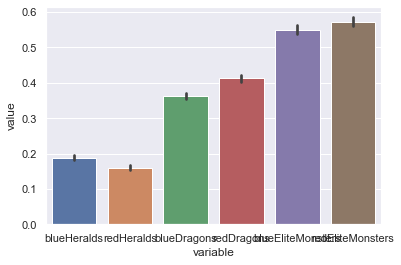

In [18]:
sns.barplot(
    x="variable", y="value", data=lol_data_melt,
)

## Task 8

`[1.0]` Create a seaborn `scatterplot` of `lol_data`.

- For `x` select `blueGoldPerMin`,
- For `y` select `redGoldPerMin`, 
- Color the graph by `whoWon`,
- Change dots to be different based on `firstKill` (dots and crosses).

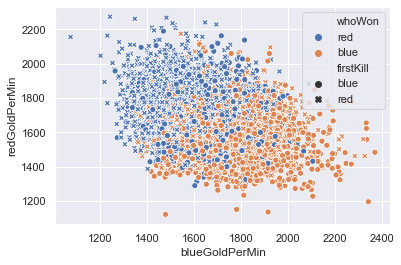

In [19]:
sns.scatterplot(
    x="blueGoldPerMin",
    y="redGoldPerMin",
    hue="whoWon",
    style="firstKill",
    data=lol_data,
)

## Task 9

`[0.5]` Create a horizontal `matplotlib` subplot that holds two distribution plots using seaborn for `lol_data`: `redCSPerMin` and `blueCSPerMin`.

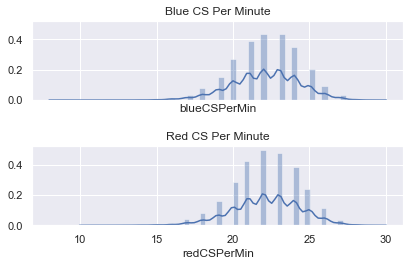

In [20]:
fig, axs = plt.subplots(2, sharex=True, sharey=True)

sns.distplot(lol_data.blueCSPerMin, ax=axs[0])
axs[0].set_title("Blue CS Per Minute")

sns.distplot(lol_data.redCSPerMin, ax=axs[1])
axs[1].set_title("Red CS Per Minute")
fig.tight_layout(pad=1.5)

`[0.5]` Create a seaborn `boxplot` using `lol_data` for the `blueAvgLevel` column depending on `whoWon`.

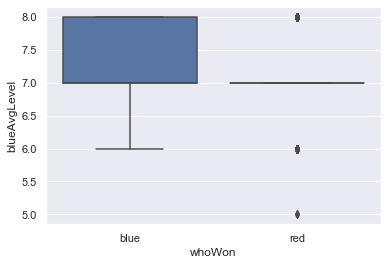

In [21]:
sns.boxplot(x="whoWon", y="blueAvgLevel", data=lol_data)

## Task 10

`[1.0]` Create a triangle (half square) seaborn `clustermap` of the `lol_data` correlations.

- Change the color palette to "mako"

*Hint: You can check stack overflow how to create masks using `numpy`.*

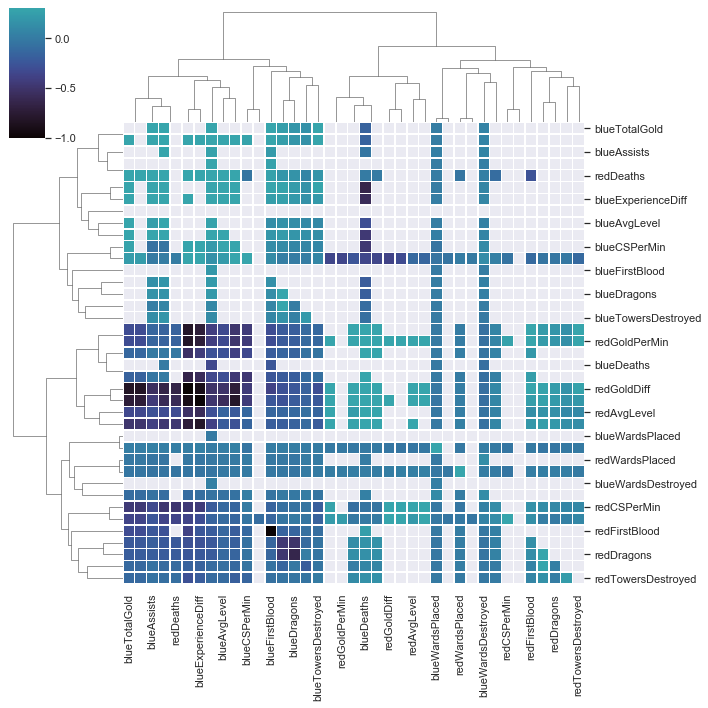

In [22]:
##niestety nie udało mi się zrobić trójkąta :(
corr = lol_data.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool)
sns.clustermap(
    corr,
    mask=mask_ut,
    cmap="mako",
    vmax=0.3,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)